t-SNE means t-distribution Stochastic Neighborhood Embedding

**Dimensionality reduction**
1D, 2D, and 3D data can be visualized. And it’s not always possible to work with a dataset having less than or equal to 3 dimensions in the field of data science. We may end up in a situation to work with higher dimensional data. For a data science professional, it is necessary to visualize and get insights about the working data to do a better job. To mitigate this, dimensionality reduction techniques have been evolved.

Another most popular use case of the dimensionality reduction technique is to reduce the computational complexity while training ML models. By using the dimensionality reduction technique the dataset has been reduced in terms of size and at the same time, the information about the original data has been carried out to the lower-dimensional data. So it is easy and not time-consuming for the machine learning algorithms to learn from the input dataset.

**PCA- Principle Component Analysis** is a giant in the field of dimensionality reduction. It was first developed by Pearson in1901 and many people did improvisations on it. Even though PCA is a widely used technique, it will also have some drawbacks, the major drawback in PCA is it will fail to maintain the local structures of the dataset. To mitigate this issue t-SNE came into picture.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/drive/MyDrive/Healthcare/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
X = df.drop('class', axis=1)
y = df['class']
y = y.map({'p': 'Posionous', 'e': 'Edible'})
cat_cols= X.select_dtypes(include='object').columns.tolist()
print('cat_cols',cat_cols)
# for col in cat_cols:
#     print (f" col name : {col}, N Unique : {X[col].nunique()}")

cat_cols ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [11]:
for col in cat_cols:
    X[col]=X[col].astype("category")
    X[col]=X[col].cat.codes
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_std)
X_pca = np.vstack((X_pca.T, y)).T
df_pca = pd.DataFrame(X_pca, columns=['1st_Component',                 '2nd_Component', 'class'])
df_pca.head()

,1st_Component,2nd_Component,class
0,-0.574322,-0.975783,Posionous
1,-2.282102,0.279068,Edible
2,-1.858036,-0.270971,Edible
3,-0.884781,-0.756465,Posionous
4,0.689614,1.239255,Edible


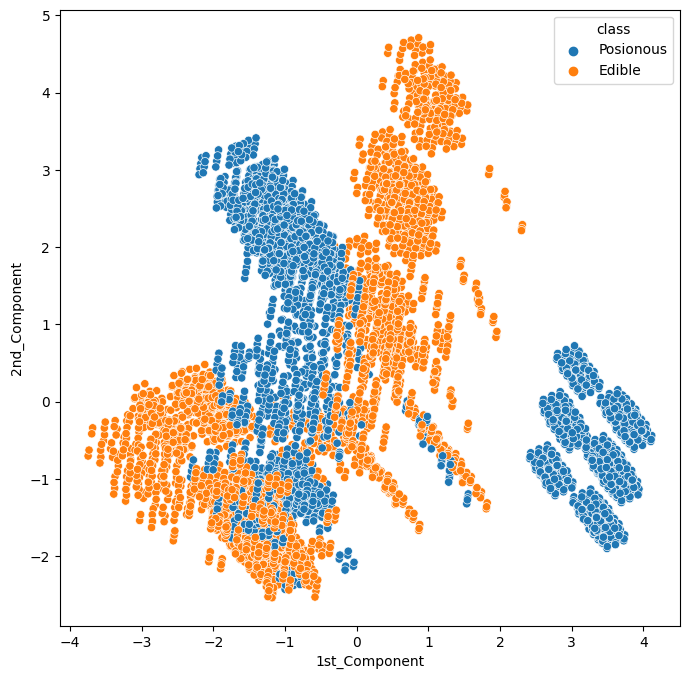

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_pca, hue='class', x='1st_Component', y='2nd_Component')
plt.show()

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

,Dim1,Dim2,class
0,7.916276,-45.019863,Posionous
1,-58.82917,7.982639,Edible
2,-64.645126,21.935324,Edible
3,12.62655,-41.933815,Posionous
4,7.946126,34.096298,Edible


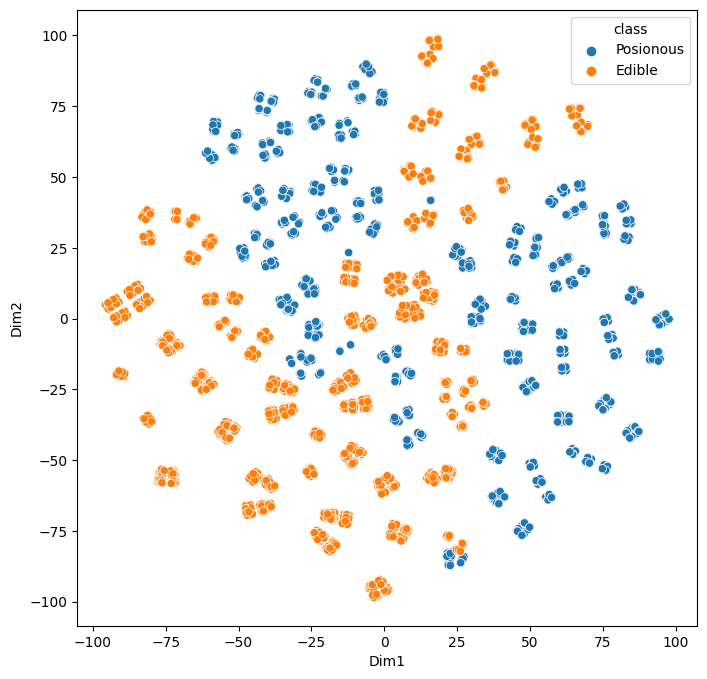

In [20]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()

By the above classification results, we can say t-SNE outperformed when compared with the performance of PCA.
t-SNE algorithm clustered poisonous and edible mushrooms without any overlapping


PCA failed to cluster the mushroom classed perfectly.
To know where we can get a stable shape we should play around with perplexity and n_iter parameters.
After perplexity = 30 and n_iter = 5000, the clustering shape became stable.




Conclusion:
t-SNE is a state of art in dimensionality reduction techniques. Unlike PCA, t-SNE can be applied and work better with both linear and nonlinear well-clustered datasets and produces more meaningful clustering. While t-SNE is excellent in visualizing the well-separated clusters, most of the time it fails to preserve the global geometry of the data.

https://medium.com/analytics-vidhya/what-is-t-sne-37bfb920e431#:~:text=t%2DSNE%20(%20t%2DDistributed%20Stochastic%20Neighbor%20Embedding)%20is,and%20produces%20significantly%20better%20visualization.


https://medium.com/swlh/everything-about-t-sne-dde964f0a8c1